In [1]:
## 01. Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [4]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [5]:
# Setting Path 

path = r'C:\Users\ASUS\ClimateWins 07.24\02 Data Set'

In [6]:
# Import data

df = pd.read_csv(os.path.join(path,'Prepared Data', 'climate_nodate_cleaned.csv'))

In [7]:
pleasant = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [8]:
# Check data

df.head(1)

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0                  7            0.85           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                     0.0                7.0                 3.7   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   

   DEBILT_sunshine  DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  \
0              0.0               9.3              7.4             11.0   

   DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                       8                 0.83               1.0161   

   DUSSELDORF_global_radiation  DUSSELDORF_precipitation  DUSSELDORF_sunshine  \
0                         0.12                      0.08                  0.0   

   DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  \
0                  10.0                  7.0                 11.5   

   HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0                     7               0.91              1.001   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.13                    0.22                0.0   

   HEATHROW_temp_mean  HEATHROW_temp_min  KASSEL_cloud_cover  \
0                10.6                9.4                   8   

   HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
0                8.3             0.82           1.0094   

   KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
0                     0.28                  0.48              1.6   

   KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  LJUBLJANA_cloud_cover  \
0               7.9              3.9              9.4                      8   

   LJUBLJANA_humidity  LJUBLJANA_pressure  LJUBLJANA_global_radiation  \
0                 1.0              1.0173                         0.2   

   LJUBLJANA_precipitation  LJUBLJANA_sunshine  LJUBLJANA_temp_mean  \
0                      0.0                 0.0                 -0.6   

   LJUBLJANA_temp_min  LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  \
0                -1.9                 0.5                       7   

   MAASTRICHT_humidity  MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
0                 0.83               1.0063                         0.22   

   MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
0                      0.32                  1.0                   9.5   

   MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
0                  8.5                 11.1                   6   

   MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
0             0.92            1.026                     0.53   

   MADRID_precipitation  MADRID_sunshine  MADRID_temp_mean  MADRID_temp_min  \
0                   0.0              1.4               7.6              4.4   

   MADRID_temp_ma

In [9]:
pleasant.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   

   VALENTIA_pleasant_weather  
0                          0

In [10]:
# Check shape

df.shape

(22950, 136)

In [11]:
# Check shape

pleasant.shape

(22950, 16)

In [12]:
##Preprocessing for Random Forest 1 (2010s Weather Data)

In [13]:
#Combine date and cleaned data
climate_date = pd.concat([pleasant['DATE'],df], axis=1)
climate_date

DATE  Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  \
0      19600101           0                  7            0.85   
1      19600102           1                  6            0.84   
2      19600103           2                  8            0.90   
3      19600104           3                  3            0.92   
4      19600105           4                  6            0.95   
...         ...         ...                ...             ...   
22945  20221027       22945                  1            0.79   
22946  20221028       22946                  6            0.77   
22947  20221029       22947                  4            0.76   
22948  20221030       22948                  5            0.80   
22949  20221031       22949                  5            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
0                 0.7              6.5             0.8            10.9   
1                 1.1              6.1             3.3            10.1   
2                 0.0              8.5             5.1             9.9   
3                 4.1              6.3             3.8            10.6   
4                 5.4              3.0            -0.7             6.0   
...               ...              ...             ...             ...   
22945             7.7             15.9            11.4            21.4   
22946             5.4             16.7            14.3            21.9   
22947             6.1             16.7            13.1            22.4   
22948             5.8             15.4            11.6            21.1   
22949             3.2             13.5             9.9            19.2   

       BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0                         1               0.81             1.0195   
1                         6               0.84             1.0172   
2                         6               0.77             1.0179   
3                         8               0.93             1.0268   
4                         8               0.99             1.0286   
...                     ...                ...                ...   
22945                     2               0.68             1.0278   
22946                     0               0.68             1.0295   
22947                     2               0.68             1.0278   
22948                     1               0.68             1.0238   
22949                     4               0.68             1.0235   

       BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                           0.88                    0.00                7.0   
1                           0.25                    0.00                0.0   
2                           0.67                    0.00                3.5   
3                           0.25                    0.00                0.0   
4                           0.25                    0.06                0.0   
...                          ...                     ...                ...   
22945                       1.57                    0.18                5.7   
22946                      

In [14]:
#Reduce your dataset to a single year
dfyear = climate_date.loc[climate_date['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] #<-----INSERT YEAR HERE
dfyear

DATE  Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  \
18628  20110101       18628                  8            0.97   
18629  20110102       18629                  8            0.94   
18630  20110103       18630                  4            0.93   
18631  20110104       18631                  6            0.89   
18632  20110105       18632                  5            0.79   
...         ...         ...                ...             ...   
22276  20201227       22276                  8            0.70   
22277  20201228       22277                  7            0.74   
22278  20201229       22278                  6            0.74   
22279  20201230       22279                  6            0.85   
22280  20201231       22280                  7            0.86   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
18628          1.0232                    0.13                 0.00   
18629          1.0234                    0.13                 0.00   
18630          1.0254                    0.64                 0.00   
18631          1.0208                    0.38                 0.00   
18632          1.0142                    0.64                 0.06   
...               ...                     ...                  ...   
22276          1.0007                    0.26                 0.41   
22277          0.9828                    0.26                 0.11   
22278          0.9945                    0.25                 0.22   
22279          1.0069                    0.32                 0.04   
22280          1.0069                    0.21                 0.71   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
18628             0.0             -0.2            -0.8             0.3   
18629             0.0             -0.2            -3.9             1.4   
18630             6.1             -3.3            -5.2            -0.9   
18631             1.0             -3.6            -5.8            -1.9   
18632             6.5             -0.8            -5.4             2.5   
...               ...              ...             ...             ...   
22276             0.0              1.7            -3.6             9.9   
22277             0.4              4.6             1.9             8.1   
22278             0.2              4.4             1.6             6.9   
22279             0.3              2.6             0.5             4.9   
22280             0.0              1.9            -1.2             4.8   

       BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
18628                     4               0.92             1.0227   
18629                     8               0.90             1.0190   
18630                     7               0.91             1.0217   
18631                     4               0.85             1.0258   
18632                     1               0.81             1.0243   
...                     ...                ...                ...   
22276                     7               0.68             1.0146   
22277                     4               0.68             1.0002   
22278                     2               0.68             1.0018   
22279                     7               0.68             1.0057   
22280                     7               0.68             1.0071   

       BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
18628                       0.64                    0.00                3.1   
18629                       0.25                    0.01                0.0   
18630                       0.25                    0.08                0.0   
18631                       0.37                    0.00                0.4   
18632                       0.75                    0.00                4.5   
...                          ...                     ...                ...   
22276                       1.57                    0.00                0.0   
22277                      

In [15]:
climate_nodate = dfyear.drop(['DATE'], axis=1)

In [16]:
climate_nodate = climate_nodate.drop(['Unnamed: 0'], axis=1)

In [17]:
#Reduce your dataset to a decade
pleasant_year = pleasant.loc[pleasant['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] #<-----INSERT YEAR HERE
pleasant_year

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18628  20110101                       0                          0   
18629  20110102                       0                          0   
18630  20110103                       0                          0   
18631  20110104                       0                          0   
18632  20110105                       0                          0   
...         ...                     ...                        ...   
22276  20201227                       0                          0   
22277  20201228                       0                          0   
22278  20201229                       0                          0   
22279  20201230                       0                          0   
22280  20201231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18628                          0                        0   
18629                          0                        0   
18630                          0                        0   
18631                          0                        0   
18632                          0                        0   
...                          ...                      ...   
22276                          0                        0   
22277                          0                        0   
22278                          0                        0   
22279                          0                        0   
22280                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18628                            0                          0   
18629                            0                          0   
18630                            0                          0   
18631                            0                          0   
18632                            0                          0   
...                            ...                        ...   
22276                            0                          0   
22277                            0                          0   
22278                            0                          0   
22279                            0                          0   
22280                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18628                        0                           0   
18629                        0                           0   
18630                        0                           0   
18631                        0                           0   
18632                        0                           0   
...                        ...                         ...   
22276                        0                           0   
22277                        0                           0   
22278                        0                           0   
22279                        0                           0   
22280                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18628                            0                        0   
18629                            0                        0   
18630                            0                        0   
18631                            0                        0   
18632                            0                        0   
...                            ...                      ...   
22276                            0                        0   
22277                            0                        0   
22278                            0                        0   
22279                            0                        0   
22280                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18628                          0                      0   
18629                          0    

In [18]:
pleasant_no_year = pleasant_year.drop(['DATE'], axis=1)

In [19]:
tf.random.set_seed(42)

In [20]:
X = climate_nodate
y = pleasant_no_year
X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18628                  8            0.97          1.0232   
18629                  8            0.94          1.0234   
18630                  4            0.93          1.0254   
18631                  6            0.89          1.0208   
18632                  5            0.79          1.0142   
...                  ...             ...             ...   
22276                  8            0.70          1.0007   
22277                  7            0.74          0.9828   
22278                  6            0.74          0.9945   
22279                  6            0.85          1.0069   
22280                  7            0.86          1.0069   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18628                    0.13                 0.00             0.0   
18629                    0.13                 0.00             0.0   
18630                    0.64                 0.00             6.1   
18631                    0.38                 0.00             1.0   
18632                    0.64                 0.06             6.5   
...                       ...                  ...             ...   
22276                    0.26                 0.41             0.0   
22277                    0.26                 0.11             0.4   
22278                    0.25                 0.22             0.2   
22279                    0.32                 0.04             0.3   
22280                    0.21                 0.71             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18628             -0.2            -0.8             0.3                     4   
18629             -0.2            -3.9             1.4                     8   
18630             -3.3            -5.2            -0.9                     7   
18631             -3.6            -5.8            -1.9                     4   
18632             -0.8            -5.4             2.5                     1   
...                ...             ...             ...                   ...   
22276              1.7            -3.6             9.9                     7   
22277              4.6             1.9             8.1                     4   
22278              4.4             1.6             6.9                     2   
22279              2.6             0.5             4.9                     7   
22280              1.9            -1.2             4.8                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18628               0.92             1.0227                       0.64   
18629               0.90             1.0190                       0.25   
18630               0.91             1.0217                       0.25   
18631               0.85             1.0258                       0.37   
18632               0.81             1.0243                       0.75   
...                  ...                ...                        ...   
22276               0.68             1.0146                       1.57   
22277               0.68             1.0002                       1.57   
22278               0.68             1.0018                       1.57   
22279               0.68             1.0057                       1.57   
22280               0.68             1.0071                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18628                    0.00                3.1                -5.5   
18629                    0.01                0.0                -3.1   
18630                    0.08                0.0                -2.2   
18631                    0.00                0.4                -4.0   
18632                    0.00                4.5                -3.4   
...                       ...                ...                 ...   
22276                    0.00                0.0                 2.7   
22277              

In [21]:
y

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18628                       0                          0   
18629                       0                          0   
18630                       0                          0   
18631                       0                          0   
18632                       0                          0   
...                       ...                        ...   
22276                       0                          0   
22277                       0                          0   
22278                       0                          0   
22279                       0                          0   
22280                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18628                          0                        0   
18629                          0                        0   
18630                          0                        0   
18631                          0                        0   
18632                          0                        0   
...                          ...                      ...   
22276                          0                        0   
22277                          0                        0   
22278                          0                        0   
22279                          0                        0   
22280                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18628                            0                          0   
18629                            0                          0   
18630                            0                          0   
18631                            0                          0   
18632                            0                          0   
...                            ...                        ...   
22276                            0                          0   
22277                            0                          0   
22278                            0                          0   
22279                            0                          0   
22280                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18628                        0                           0   
18629                        0                           0   
18630                        0                           0   
18631                        0                           0   
18632                        0                           0   
...                        ...                         ...   
22276                        0                           0   
22277                        0                           0   
22278                        0                           0   
22279                        0                           0   
22280                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18628                            0                        0   
18629                            0                        0   
18630                            0                        0   
18631                            0                        0   
18632                            0                        0   
...                            ...                      ...   
22276                            0                        0   
22277                            0                        0   
22278                            0                        0   
22279                            0                        0   
22280                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18628                          0                      0   
18629                          0                      0   
18630                          0                      0   
18631                          0  

In [22]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [23]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922, 15)
(731, 135) (731, 15)


In [25]:
#### Grid Search

In [26]:
# creating a RF classifier
clf = RandomForestClassifier()
  
# Grid search cv
grid_space={'max_depth':[3,5,10,15,20, None],
              'n_estimators':[10,100,200,250,350,400],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[1,2,3,4,5]
           }

In [27]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2160 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-package

Search took 77.79417180220285 minutes


In [28]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}
Best GRID search score is: 0.5509924709103354


In [29]:
#### Random search

In [30]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [31]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [32]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 18.003496793905892 minutes


In [33]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 310}
Best RANDOM search score is: 0.5314852840520191


In [34]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}
Best GRID search score is: 0.5509924709103354
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 310}
Best RANDOM search score is: 0.5314852840520191


In [35]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 310, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=6,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=310)

In [36]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5499316005471956


In [37]:
pred = ['Bad weather','Good weather']

[Text(0.42077606726044225, 0.9736842105263158, 'x[8] <= 17.65\nentropy = 0.685\nsamples = 1854\nvalue = [[2139.0, 783.0]\n[1850.0, 1072.0]\n[1843.0, 1079.0]\n[2269.0, 653.0]\n[2230.0, 692.0]\n[2210.0, 712.0]\n[2748.0, 174.0]\n[2013.0, 909.0]\n[2208.0, 714.0]\n[1466.0, 1456.0]\n[2190.0, 732.0]\n[2453.0, 469.0]\n[2922.0, 0.0]\n[2354.0, 568.0]\n[2922.0, 0.0]]'),
 Text(0.16320510851760853, 0.9210526315789473, 'x[125] <= 9.15\nentropy = 0.223\nsamples = 1013\nvalue = [[1585, 0]\n[1398, 187]\n[1442, 143]\n[1553, 32]\n[1535, 50]\n[1492, 93]\n[1582, 3]\n[1487, 98]\n[1545, 40]\n[1191, 394]\n[1564, 21]\n[1557, 28]\n[1585, 0]\n[1550, 35]\n[1585, 0]]'),
 Text(0.07134264946764947, 0.868421052631579, 'x[15] <= 11.8\nentropy = 0.093\nsamples = 767\nvalue = [[1183.0, 0.0]\n[1111.0, 72.0]\n[1154.0, 29.0]\n[1178.0, 5.0]\n[1178.0, 5.0]\n[1176.0, 7.0]\n[1182.0, 1.0]\n[1166.0, 17.0]\n[1179.0, 4.0]\n[1029.0, 154.0]\n[1175.0, 8.0]\n[1183.0, 0.0]\n[1183.0, 0.0]\n[1183.0, 0.0]\n[1183.0, 0.0]]'),
 Text(0.029484

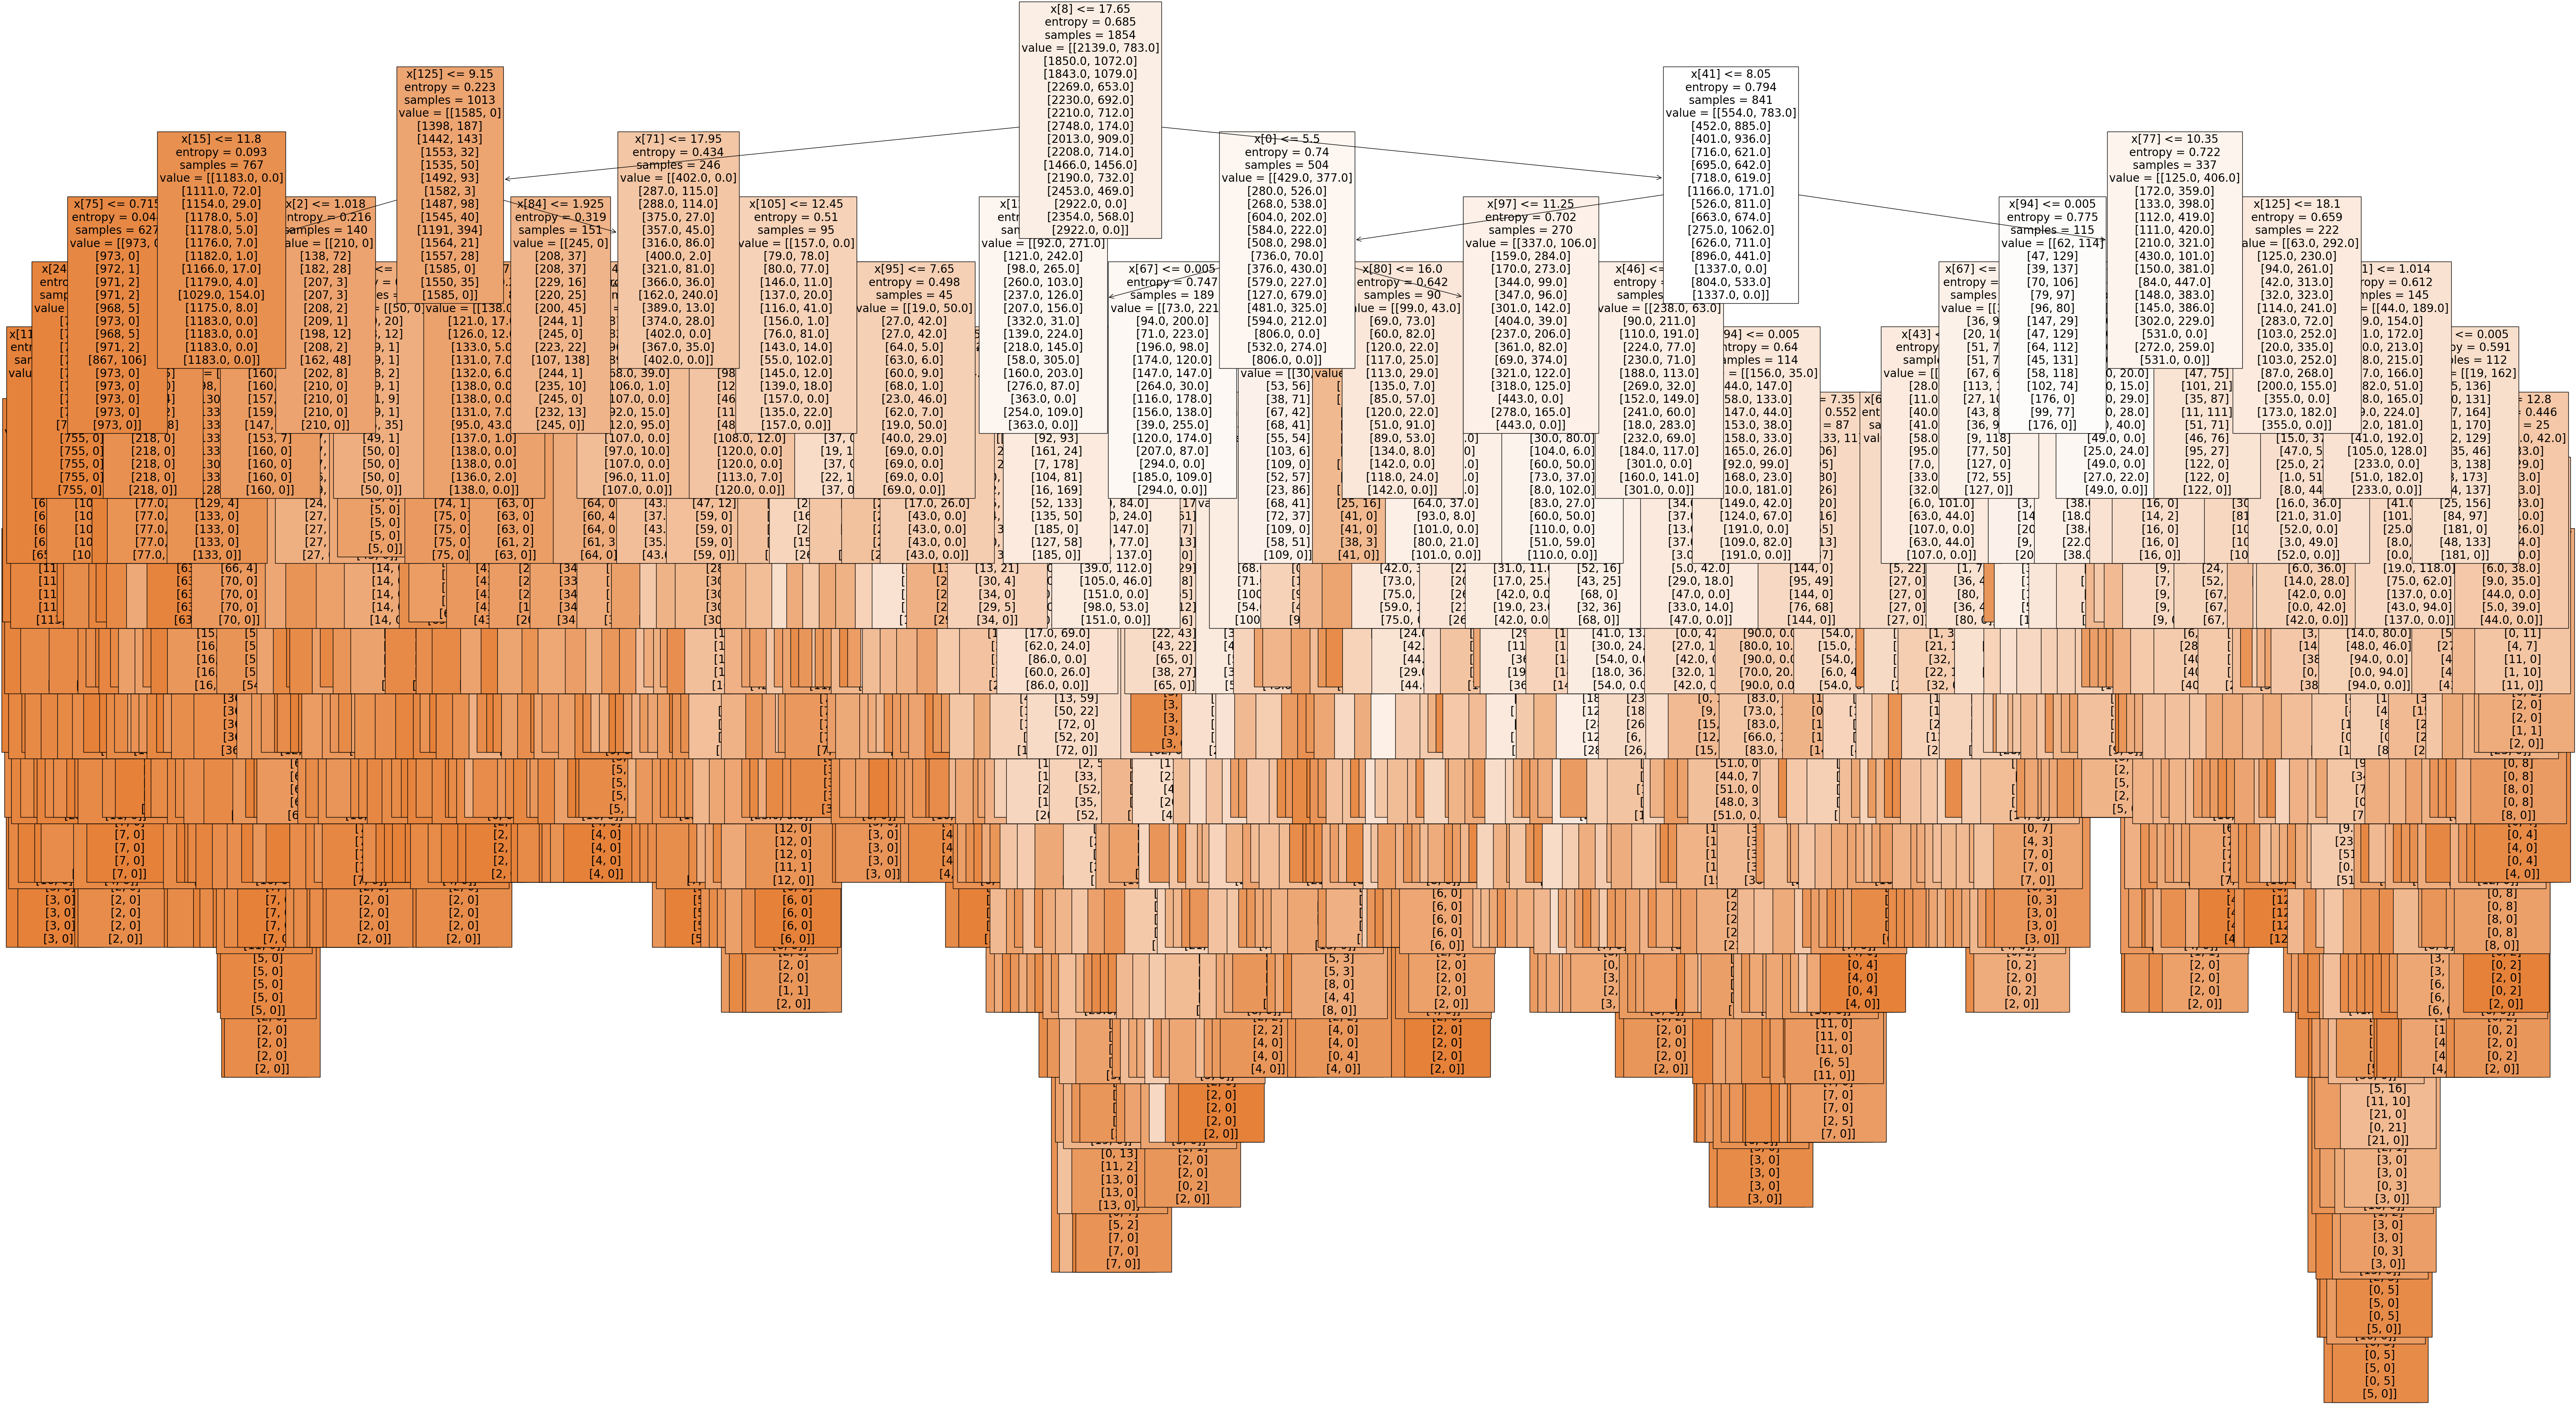

In [38]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=pred, filled=True)

In [39]:
fig.savefig(f"{path}/decision_tree_2.4.png")

In [40]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.42381754e-03, 4.28996026e-03, 3.83192246e-03, 5.82852728e-03,
       1.33768297e-02, 9.49694606e-03, 2.48150387e-02, 6.90970921e-03,
       2.71361800e-02, 3.99698664e-03, 2.90447653e-03, 3.92142185e-03,
       3.44532806e-03, 1.31996893e-02, 3.18383246e-03, 1.38313947e-02,
       7.46232487e-03, 1.44250837e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.84285465e-04, 1.21602587e-02, 6.76179488e-04,
       1.81771853e-02, 1.35388714e-02, 2.54576358e-02, 2.41582704e-03,
       3.04140922e-03, 5.21414683e-03, 9.27078176e-03, 1.28969153e-02,
       5.83830716e-03, 1.19691307e-02, 2.77268513e-03, 2.75273718e-02,
       3.02440294e-03, 5.03191726e-03, 4.84597616e-03, 5.43052431e-03,
       1.68450129e-02, 6.66581634e-03, 1.59562795e-02, 5.23935811e-03,
       3.17666057e-02, 2.39110607e-03, 4.07085983e-03, 4.17447180e-03,
       8.76792658e-03, 9.51475619e-03, 4.67070767e-03, 1.24089947e-02,
       4.17436061e-03, 3.53457851e-03, 1.98570372e-02, 1.80188152e-03,
      

In [41]:
np.set_printoptions(threshold=1000)

In [42]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.42381754e-03, 4.28996026e-03, 3.83192246e-03, 5.82852728e-03,
         1.33768297e-02, 9.49694606e-03, 2.48150387e-02, 6.90970921e-03,
         2.71361800e-02],
        [3.99698664e-03, 2.90447653e-03, 3.92142185e-03, 3.44532806e-03,
         1.31996893e-02, 3.18383246e-03, 1.38313947e-02, 7.46232487e-03,
         1.44250837e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.84285465e-04,
         1.21602587e-02, 6.76179488e-04, 1.81771853e-02, 1.35388714e-02,
         2.54576358e-02],
        [2.41582704e-03, 3.04140922e-03, 5.21414683e-03, 9.27078176e-03,
         1.28969153e-02, 5.83830716e-03, 1.19691307e-02, 2.77268513e-03,
         2.75273718e-02],
        [3.02440294e-03, 5.03191726e-03, 4.84597616e-03, 5.43052431e-03,
         1.68450129e-02, 6.66581634e-03, 1.59562795e-02, 5.23935811e-03,
         3.17666057e-02],
        [2.39110607e-03, 4.07085983e-03, 4.17447180e-03, 8.76792658e-03,
         9.51475619e-03, 4.67070767e-03, 1.24089947e-02, 4.17436061

In [43]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09910893, 0.06637054, 0.07059442, 0.08094657, 0.09480589,
       0.05370776, 0.03861638, 0.08097386, 0.08726249, 0.06992841,
       0.08857951, 0.06560259, 0.04621269, 0.05436701, 0.00292295])

In [44]:
df.columns.tolist()

['Unnamed: 0',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDO

In [45]:
variables = [
    'Basel',
    'Belgrade',
    'Budapest',
    'Debilt',
    'Dusseldorf',
    'Heathrow',
    'Kassel',
    'Ljubljana',
    'Maastricht',
    'Madrid',
    'Munchenb',
    'Oslo',
    'Sonnblick',
    'Stockholm',
    'Valentia'
]

In [46]:
important = pd.Series(sumarray, index = variables) #.sort_values(ascending = False)
important

Basel         0.099109
Belgrade      0.066371
Budapest      0.070594
Debilt        0.080947
Dusseldorf    0.094806
Heathrow      0.053708
Kassel        0.038616
Ljubljana     0.080974
Maastricht    0.087262
Madrid        0.069928
Munchenb      0.088580
Oslo          0.065603
Sonnblick     0.046213
Stockholm     0.054367
Valentia      0.002923
dtype: float64

['Basel', 'Belgrade', 'Budapest', 'Debilt', 'Dusseldorf', 'Heathrow', 'Kassel', 'Ljubljana', 'Maastricht', 'Madrid', 'Munchenb', 'Oslo', 'Sonnblick', 'Stockholm', 'Valentia']


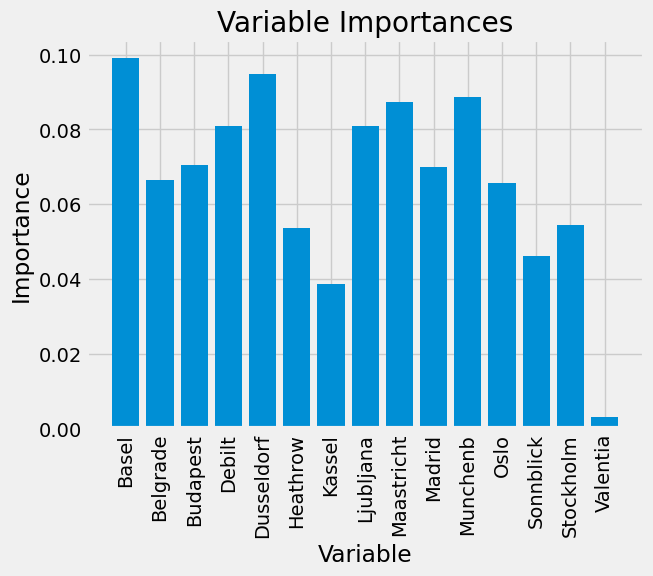

In [47]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(variables)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, variables, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [70]:
####DUSSELDORF

In [72]:
climate_DUSSELDORF = df[['DUSSELDORF_cloud_cover','DUSSELDORF_humidity','DUSSELDORF_pressure','DUSSELDORF_global_radiation','DUSSELDORF_precipitation','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max']]
climate_DUSSELDORF

DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                           8                 0.83               1.0161   
1                           8                 0.89               1.0161   
2                           7                 0.95               1.0161   
3                           8                 0.86               1.0161   
4                           7                 0.92               1.0161   
...                       ...                  ...                  ...   
22945                       8                 0.75               1.0214   
22946                       7                 0.71               1.0186   
22947                       8                 0.73               1.0196   
22948                       7                 0.73               1.0176   
22949                       8                 0.78               1.0184   

       DUSSELDORF_global_radiation  DUSSELDORF_precipitation  \
0                             0.12                      0.08   
1                             0.18                      0.66   
2                             0.12                      0.07   
3                             0.12                      0.02   
4                             0.12                      0.62   
...                            ...                       ...   
22945                         1.13                      0.20   
22946                         1.13                      0.20   
22947                         1.13                      0.20   
22948                         1.13                      0.20   
22949                         1.13                      0.20   

       DUSSELDORF_sunshine  DUSSELDORF_temp_mean  DUSSELDORF_temp_min  \
0                      0.0                  10.0                  7.0   
1                      0.5                   8.2                  7.4   
2                      0.0                   7.1                  6.9   
3                      0.0                   6.8                  3.6   
4                      0.0                   7.7                  6.2   
...                    ...                   ...                  ...   
22945                  6.4                  17.8                 13.6   
22946                  4.9                  19.4                 15.4   
22947                  4.0                  18.2                 13.4   
22948                  6.9                  16.7                 11.9   
22949                  1.7                  15.2                  9.7   

       DUSSELDORF_temp_max  
0                     11.5  
1                     11.0  
2                      9.1  
3                      8.0  
4                     11.0  
...                    ...  
22945                 21.4  
22946                 23.9  
22947                 22.0  
22948                 21.1  
22949                 19.5  

[22950 rows x 9 columns]

In [73]:
pleasant 

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [74]:
pleasant_DUSSELDORF = pleasant [['DUSSELDORF_pleasant_weather']]
pleasant_DUSSELDORF

DUSSELDORF_pleasant_weather
0                                0
1                                0
2                                0
3                                0
4                                0
...                            ...
22945                            0
22946                            0
22947                            0
22948                            0
22949                            0

[22950 rows x 1 columns]

In [75]:
X = climate_munchenb
y = pleasant_munchenb
X

MUNCHENB_cloud_cover  MUNCHENB_humidity  MUNCHENB_pressure  \
0                         5               0.67             1.0304   
1                         6               0.72             1.0292   
2                         6               0.91             1.0320   
3                         6               0.90             1.0443   
4                         5               0.85             1.0430   
...                     ...                ...                ...   
22945                     2               0.76             1.0263   
22946                     6               0.70             1.0263   
22947                     7               0.64             1.0263   
22948                     6               0.75             1.0263   
22949                     5               0.83             1.0263   

       MUNCHENB_global_radiation  MUNCHENB_precipitation  MUNCHENB_sunshine  \
0                           0.20                    0.10                0.0   
1                           0.61                    0.30                5.1   
2                           0.20                    0.30                0.0   
3                           0.20                    0.01                0.0   
4                           0.65                    0.96                5.6   
...                          ...                     ...                ...   
22945                       1.37                    0.26                9.7   
22946                       1.37                    0.26                7.7   
22947                       1.37                    0.26                6.8   
22948                       1.37                    0.26                8.3   
22949                       1.37                    0.26                6.8   

       MUNCHENB_temp_mean  MUNCHENB_temp_min  MUNCHENB_temp_max  
0                     6.9                1.1               10.4  
1                     6.2                4.2               10.2  
2                     5.8                4.0                8.0  
3                     3.9                3.2                5.4  
4                     1.8               -3.0                6.0  
...                   ...                ...                ...  
22945                14.3                8.3               22.2  
22946                16.1                8.9               26.1  
22947                17.4               11.2               26.2  
22948                14.5                9.2               23.5  
22949                12.9                7.9               19.6  

[22950 rows x 9 columns]

In [76]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [77]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [78]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [79]:
# creating a RF classifier
clf4 = RandomForestClassifier()

In [80]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [81]:
start = time.time()
grid = GridSearchCV(clf4,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\s

Search took 2.5462104002634685 minutes


In [59]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


In [82]:
# creating a RF classifier with the best results from above
clf5 = RandomForestClassifier(n_estimators = 10, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf5.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=3, max_features=7,
                       min_samples_leaf=2, n_estimators=10)

In [83]:
# performing predictions on the test dataset
y_pred = clf5.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9986928104575163


In [84]:
pred = ['Bad weather','Good weather']

[Text(0.4, 0.875, 'x[8] <= 17.95\nentropy = 0.731\nsamples = 11595\nvalue = [14608.0, 3752.0]\nclass = Bad weather'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 7456\nvalue = [11795, 0]\nclass = Bad weather'),
 Text(0.6, 0.625, 'x[4] <= 0.005\nentropy = 0.985\nsamples = 4139\nvalue = [2813, 3752]\nclass = Good weather'),
 Text(0.4, 0.375, 'x[3] <= 1.205\nentropy = 0.093\nsamples = 2402\nvalue = [45, 3752]\nclass = Good weather'),
 Text(0.2, 0.125, 'entropy = 0.787\nsamples = 125\nvalue = [43, 140]\nclass = Good weather'),
 Text(0.6, 0.125, 'entropy = 0.007\nsamples = 2277\nvalue = [2.0, 3612.0]\nclass = Good weather'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 1737\nvalue = [2768, 0]\nclass = Bad weather')]

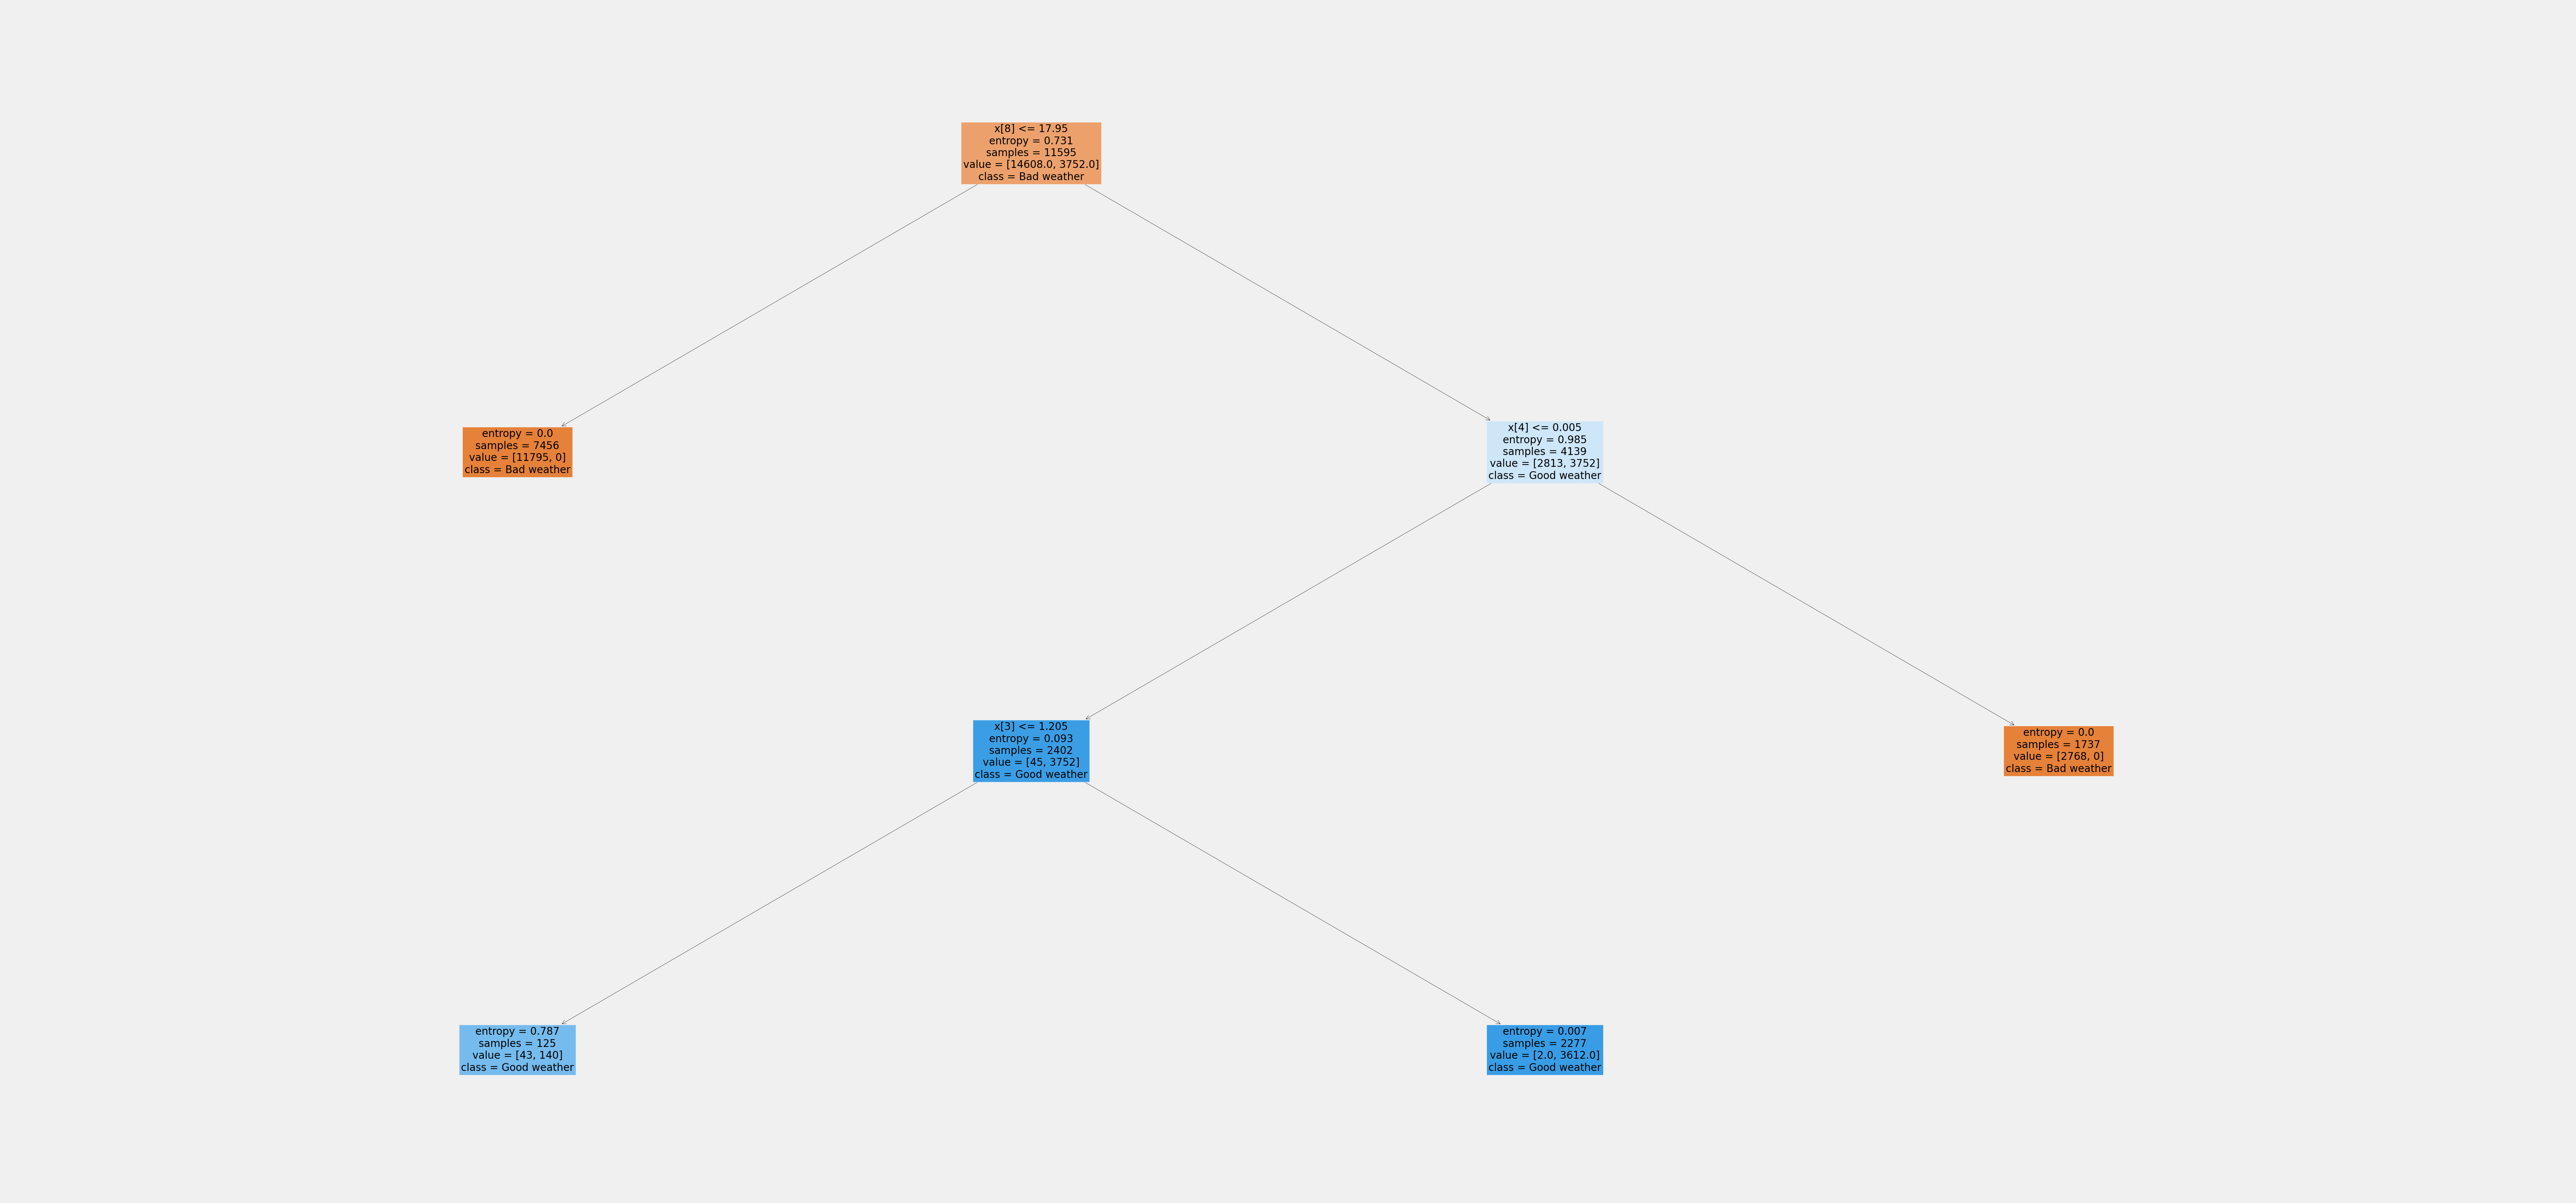

In [85]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf5.estimators_[5], fontsize = 20, class_names=pred, filled=True)

In [86]:
fig.savefig(f"{path}/decision_tree_munchenb_2.4.png")

In [87]:
np.set_printoptions(threshold=np.inf)
newarray = clf5.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.03490274, 0.        , 0.        , 0.00138935, 0.41178787,
       0.00930333, 0.07515821, 0.00048616, 0.46697235])

In [88]:
np.set_printoptions(threshold=1000)

In [89]:
variables = [
    'Cloud cover',
    'Humidity',
    'Pressure',
    'Global ratiation',
    'Precipitation',
    'Sunshine',
    'Temp mean',
    'Temp min',
    'Temp max'
]

In [90]:
important = pd.Series(newarray, index = variables) #.sort_values(ascending = False)
important

Cloud cover         0.034903
Humidity            0.000000
Pressure            0.000000
Global ratiation    0.001389
Precipitation       0.411788
Sunshine            0.009303
Temp mean           0.075158
Temp min            0.000486
Temp max            0.466972
dtype: float64

['Cloud cover', 'Humidity', 'Pressure', 'Global ratiation', 'Precipitation', 'Sunshine', 'Temp mean', 'Temp min', 'Temp max']


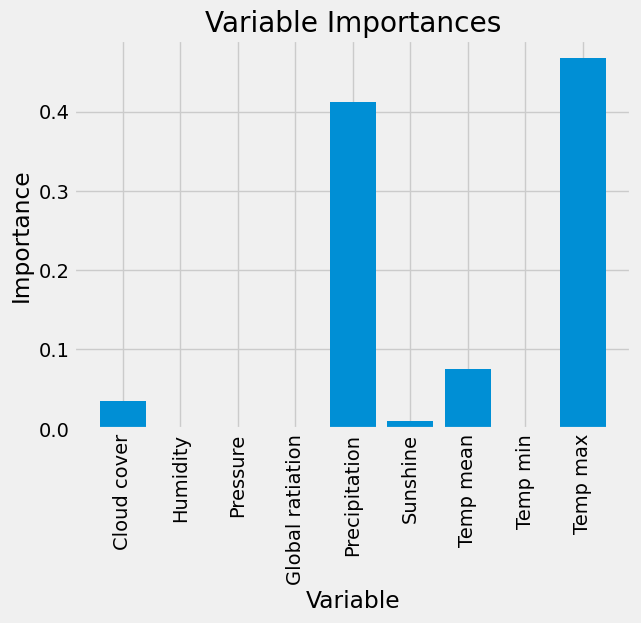

In [91]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(variables)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, variables, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');